In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

def rough_plot(in_list, num_group):
    rough_list = list()
    tmp_sum = 0
    
    for i in range(1, len(in_list)):
        tmp_sum += in_list[i]
    
        if(i%num_group == num_group-1):
            rough_list.append(tmp_sum / num_group)
            tmp_sum = 0
            
    plt.plot(rough_list)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def linear_pred(li_in):
    li = li_in.copy()
    
    li_arr = np.asarray(li)
    li_arr = np.reshape(li_arr, (len(li), 1))
    x_arr = np.arange(len(li))
    x_arr = np.reshape(x_arr, (len(li), 1))

    regr = linear_model.LinearRegression()
    regr.fit(x_arr, li_arr)
    pred = regr.predict(len(li))
    return pred[0, 0]


def plot_each_w_trend(choose_feature, w_list):
    wListTranspose = numpy.zeros(shape=(len(choose_feature), len(w_list)))

    for feature in range(0, len(choose_feature)):
        if choose_feature[feature]:
            for trial in range(0, len(w_list)):
                wListTranspose[feature][trial] = w_list[trial][feature]
            
        print(wListTranspose)

In [4]:
import sys

def next_state(state, action, action_level):
    next_state = state.copy()
    if (action > 2*action_level) or action < 0:
        print("action = ", action)
        sys.exit("error, action undefined! nxt")

    if action >= 1 and action <= action_level:
        # then buy
        
        if state['HandCash'] > 0:
            next_state['HandCash'] = state['HandCash']*(1 - action/action_level)
            next_state['NumStock'] = state['NumStock'] + \
                                     (state['HandCash']/state['StockPrice'])*(action/action_level)

    elif action >= (action_level + 1) and action <= (action_level + action_level) :
        # then sell
        
        if state['NumStock'] > 0:
            next_state['NumStock'] = state['NumStock']*(1 - (action-action_level)/action_level)
            next_state['HandCash'] = state['HandCash'] + \
                                     (state['StockPrice']*state['NumStock'])*((action-action_level)/action_level)
    
    return next_state


def reward(state, init_invest):
    return (state['NumStock']*state['StockPrice'] + state['HandCash']) - init_invest

def my_reward(curr, last):
    return (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - \
           (last['NumStock']*last['StockPrice'] + last['HandCash'])
       
def penalty_reward(curr, last):
    penalty_multiplier = 10
    k = (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - \
           (last['NumStock']*last['StockPrice'] + last['HandCash'])
    #print('k = ', curr['NumStock'], ' * ', curr['StockPrice'], ' + ',  curr['HandCash'], ' - ', last['NumStock'], ' * ', 
          #last['StockPrice'], ' + ', last['HandCash'])
    if k < 0:
        k = k*penalty_multiplier
    return k


def benefit_reward(curr, last):
    penalty_multiplier = 3000
    benefit_multiplier = 1000
    k = (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - \
           (last['NumStock']*last['StockPrice'] + last['HandCash'])
    j = k / float(last['NumStock']*last['StockPrice'] + last['HandCash'])
    if j <= -0.01:
        r = j*penalty_multiplier
    elif -0.03 < j <= -0.01:
        r = -7
    elif -0.01< j < 0.03:
        r = -2
    else:
        r = j*benefit_multiplier
    return r

def benefit_reward2(curr, last):
    penalty_multiplier = 3000
    benefit_multiplier = 1000
    k = (curr['NumStock']*curr['StockPrice'] + curr['HandCash']) - 10000#\
           #(last['NumStock']*last['StockPrice'] + last['HandCash'])
    j = k / 10000#float(last['NumStock']*last['StockPrice'] + last['HandCash'])
    if j <= -0.01:
        r = j*penalty_multiplier
    elif -0.03 < j <= -0.01:
        r = -7
    elif -0.01< j < 0.03:
        r = -2
    else:
        r = j*benefit_multiplier
    return r

In [5]:
import math
# feature 1 : indicate the difference of #stock after the action from the state
# state is a dictionary with 3 elements
def feature_1(state, action, action_level):
    if (action > 2*action_level) or action < 0:
        sys.exit("error, action undefined! f1")
        
    elif action >= 1 and action <= action_level: # buy
        tmp = (state['HandCash']/state['StockPrice'])*(action/action_level)
        if tmp > feature_1.max:
            feature_1.max = tmp
            return 1
        elif tmp < feature_1.min:
            feature_1.min = tmp
            return 0
        else:
            return (tmp - feature_1.min) / (feature_1.max - feature_1.min)

    elif action >= (action_level + 1) and action <= (action_level + action_level) : # sell
        tmp = (-1)*state['NumStock'] * ((action-action_level)/action_level)
        if tmp > feature_1.max:
            feature_1.max = tmp
            return 1
        elif tmp < feature_1.min:
            feature_1.min = tmp
            return 0
        else:
            return (tmp - feature_1.min) / (feature_1.max - feature_1.min)

    #elif action == (2*action_level + 1): # hold
    elif action == 0: # hold
        return 0
feature_1.max = 1
feature_1.min = 0
    

# feature 2 : indicate the difference of #Cash in Hand after the action from the state
def feature_2(state, action, action_level):
    if (action > 2*action_level) or action < 0:
        sys.exit("error, action undefined! f2")
        
    elif action >= 1 and action <= action_level: # buy
        tmp = (-1)*state['HandCash'] * (action/action_level)
        if tmp > feature_2.max:
            feature_2.max = tmp
            return 1
        elif tmp < feature_2.min:
            feature_2.min = tmp
            return 0
        else:
            return (tmp - feature_2.min) / (feature_2.max - feature_2.min)

    elif action >= (action_level + 1) and action <= (action_level + action_level) : # sell
        tmp = state['StockPrice']*state['NumStock'] * ((action-action_level)/action_level)
        if tmp > feature_2.max:
            feature_2.max = tmp
            return 1
        elif tmp < feature_2.min:
            feature_2.min = tmp
            return 0
        else:
            return (tmp - feature_2.min) / (feature_2.max - feature_2.min)

    #elif action == (2*action_level + 1): # hold
    elif action == 0: # hold
        return 0
feature_2.max = 1
feature_2.min = 0

    
# linear_based_rwd    
def feature_3(price_list, state, action, action_level):
    if (action > 2*action_level) or action < 0:
        sys.exit("error, action undefined! f3")
    
    #next_price = linear_pred(price_list)
    next_price = sum(price_list)/len(price_list)
    
    next_s = next_state(state, action, action_level)
    next_s['StockPrice'] = next_price
        
    tmp = my_reward(next_s, state)
    if tmp > feature_3.max:
        feature_3.max = tmp
        return 1
    elif tmp < feature_3.min:
        feature_3.min = tmp
        return 0
    else:
        return (tmp - feature_3.min) / (feature_3.max - feature_3.min)
    
    #return my_reward(next_s, state)/100
feature_3.max = 1
feature_3.min = 0


def feature_4(price_list, state, action, action_level):
    if (action > 2*action_level) or action < 0:
        sys.exit("error, action undefined! f4")
    
    #next_price = linear_pred(price_list)
    next_price = sum(price_list)/len(price_list)
    
    next_s = next_state(state, action, action_level)
    next_s['StockPrice'] = next_price
    
    if next_price >= state['StockPrice']:
        best_action = action_level # buy with all cash u have
    else:
        best_action = 2*action_level # sell all stocks u have
    best_next_s = next_state(state, best_action, action_level)
    best_next_s['StockPrice'] = next_price
    
    
    tmp = my_reward(best_next_s, state) - my_reward(next_s, state)
    #print("action, tmp = ", action, tmp)
    if tmp > feature_4.max:
        feature_4.max = tmp
        return 1
    elif tmp < feature_4.min:
        feature_4.min = tmp
        return 0
    else:
        return (tmp - feature_4.min) / (feature_4.max - feature_4.min)
feature_4.max = 1
feature_4.min = 0

def feature_5_conti(k_today, d_today, k_yestd, d_yestd, action, action_level):
    inter = (k_yestd+d_yestd+k_today+d_today)/4
    sinter = inter/100 # scaled inter
    if((k_yestd > d_yestd and k_today < d_today and inter > 50) or \
       (k_yestd < d_yestd and k_today > d_today and inter < 50)):
        # saction= sell all:1, sell:1~0.5, hold:0.5, buy:0.5~0, buy all:0
        # the diff btw saction & sinter(i.e. inter/100) : smaller is better(then return larger value)
        
        if(action <= action_level):
            saction = (action_level - action)/(2*action_level) # scaled action
        else:
            saction = action/(2*action_level)
            
        return 1-abs(sinter-saction)
        
    else: # best to hold
        if(action <= action_level): # hold
            return (action_level - action)/float(action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(action_level)
    
# from feature_6_my  
def feature_5_dis(k_today, d_today, k_yestd, d_yestd, action, action_level):
    inter = (k_yestd+d_yestd+k_today+d_today)/4
    if(k_yestd < d_yestd and k_today > d_today and inter < 30): # buy
        if(action <= action_level):
            return (action + action_level)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(2*action_level)
       
    elif(k_yestd > d_yestd and k_today < d_today and inter > 70): # sell
        if(action <= action_level):
            return (action_level - action)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (action)/float(2*action_level)
    else:
        if(action <= action_level): # hold
            return (action_level - action)/float(action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(action_level)
    
def psy(price_list):
    n = 0
    for i in range(1, len(price_list)):
        if price_list[i] > price_list[i-1]:
            n += 1
    return (n/float(len(price_list) - 1))*100


def feature_6_original(price_list,action,action_level):
    psy_num = psy(price_list)
    if(psy_num <= 25): # market oversell we can buy
        if(action <= action_level):
            return (action + action_level + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action - action_level)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
    if(25 < psy_num < 75):#hold to observe situation
        if(action <= action_level):
            return 2*(action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return 2*(2*action_level - action + 1)/float(2*action_level + 1)
        else:
            return 1
    if(psy_num >= 75):#market overbuy we can sell
        if(action <= action_level):
            return (action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action + 1)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
        
        
def feature_6_dis(price_list, action, action_level):
    psy_num = psy(price_list)
    if(psy_num <= 25): # market oversell we can buy
        if(action <= action_level):
            return (action + action_level)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(2*action_level)
        
    if(25 < psy_num < 75):#hold to observe situation
        if(action <= action_level):
            return (action_level - action)/float(action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(action_level)
        
    if(psy_num >= 75):#market overbuy we can sell
        if(action <= action_level):
            return (action_level - action)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            return (action)/float(2*action_level)
        
def feature_6_conti(price_list, action, action_level):
    psy_num = psy(price_list)
    spsy_num = psy_num/100

    if(action <= action_level):
        saction = (action_level - action)/(2*action_level) # scaled action
    else:
        saction = action/(2*action_level)
            
    return 1-abs(spsy_num-saction)


def feature_7(price_list, state, action, action_level):
    if(action > 2*action_level) or action < 0:
        sys.exit("error, action undefined!")
        
    price_avg = sum(price_list) / float(len(price_list))
    #print('price_avg = ', price_avg)
    
    #stock price is higher than avg_price means the stock is going up
    if price_avg <= state['StockPrice']:
    #if price_avg <= math.floor(state['StockPrice']):
        price_trend = 1
    else:
        price_trend = 0
    #print('price_trend= ', price_trend)
    
    #stock is going up, we should buy
    if price_trend == 1:
        if(action <= action_level):
            #print('in1')
            return (action + action_level)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            #print('in2')
            return (2*action_level - action)/float(2*action_level)
    #stock is going down, sell
    elif price_trend == 0:
        if(action <= action_level):
            #print('in3')
            return (action_level - action)/float(2*action_level)
        elif(action_level < action <= 2*action_level):
            #print('in4')
            return (action)/float(2*action_level)
        
def list_rev_count(inlist):
    ret = 0
    for i in range(2, len(inlist)):
        if (inlist[i] - inlist[i-1]) * (inlist[i-1] - inlist[i-2]) < 0:
            ret = ret + 1
    return ret

def feature_8_vari(price_list, action, action_level):
    if(action > 2*action_level) or action < 0:
        sys.exit("error, action undefined!")
    
    revcount = list_rev_count(price_list)
    
    if revcount > len(price_list) / 3:  # best to hold
        if(action <= action_level): 
            return (action_level - action)/float(action_level)
        elif(action_level < action <= 2*action_level):
            return (2*action_level - action)/float(action_level)
    else:
        return 0
    
def open_price_trend(state, last_state):
    # op higher than yesterday's high -> trend is up
    op_trend = 0.5
    if(state['OpenPrice'] > last_state['HighPrice']):
        op_trend += 0.2
        # up over 5% -> trend is up
        if((state['OpenPrice'] - last_state['StockPrice'])/float(last_state['StockPrice']) > 0.05):
            op_trend += 0.3
        
    # op is lower than yesterday's low -> trend is down
    if(state['OpenPrice'] < last_state['LowPrice']):
        op_trend -= 0.2
        # down over 5% -> trend is down
        if((state['OpenPrice'] - last_state['StockPrice'])/float(last_state['StockPrice']) < -0.05):
            op_trend -= 0.3
    return op_trend

def feature_9_open(version, optrend_1, optrend_2, optrend_3, optrend_4, optrend_5, action, action_level):
    if version == 1:
        optrend = optrend_1
    elif version == 2:
        trend_3day = float(optrend_1 + optrend2 + optrend_3)/float(3)
        trend = trend_3day*(0.33) + optrend_1*(0.67)
    elif version == 3:
        trend_5day = float(optrend_1+optrend_2+optrend_3+optrend_4+optrend_5)/float(5)
        trend_3day = float(optrend_1+optrend_2+optrend_3)/float(3)
        trend = trend_5day*(0.2)+trend_3day*(0.3)+optrend_1*(0.5)
    else:
        sys.exit("error, version undefined! feature_9_open")
    
    #suggest to buy
    if(trend > 0.5):
        if(action <= action_level):
            return (action + action_level + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action - action_level)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
    
    #keep observe
    if(trend == 0.5):
        if(action <= action_level):
            return 2*(action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return 2*(2*action_level - action + 1)/float(2*action_level + 1)
        else:
            return 1
    #suggest to sell
    if(trend < 0.5):
        if(action <= action_level):
            return (action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action + 1)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
        
def RSI(price_list):
    up = 0 #increase mount
    dn = 0 #decrease mount
    for i in range(1, len(price_list)):
        if price_list[i] > price_list[i-1]:
            up += price_list[i] - price_list[i-1]
        else:
            dn += price_list[i-1] - price_list[i]
    if (up+dn) == 0:
        return 0;
    else:
        return (up/float(up + dn))*100

def feature_10(rsi_6_cur, rsi_12_cur, rsi_6_last, rsi_12_last, action, action_level):
    if rsi_6_cur > 80: # overbuy so we sell out
        if(action <= action_level):
            return (action_level - action + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action + 1)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)
    elif 50 < rsi_6_cur <= 80:#stock price may go up
        if (rsi_6_last < rsi_12_last) and (rsi_6_cur > rsi_12_cur):#gold cross we can buy
            if(action <= action_level):
                return (action + action_level + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return (action - action_level)/float(2*action_level + 1)
            else:
                return (action_level+1)/float(2*action_level + 1)
        elif (rsi_6_last > rsi_12_last) and (rsi_6_cur < rsi_12_cur):#death cross we can sell
            if(action <= action_level):
                return (action_level - action + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return (action + 1)/float(2*action_level + 1)
            else:
                return (action_level+1)/float(2*action_level + 1)
        else:#keep observe
            if(action <= action_level):
                return 2*(action_level - action + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return 2*(2*action_level - action + 1)/float(2*action_level + 1)
            else:
                return 1
    elif 20 < rsi_6_cur <= 50:#stock price may go down
        if (rsi_6_last < rsi_12_last) and (rsi_6_cur > rsi_12_cur):#gold cross we can buy
            if(action <= action_level):
                return (action + action_level + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return (action - action_level)/float(2*action_level + 1)
            else:
                return (action_level+1)/float(2*action_level + 1)
        elif (rsi_6_last > rsi_12_last) and (rsi_6_cur < rsi_12_cur):#death cross we can sell
            if(action <= action_level):
                return (action_level - action + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return (action + 1)/float(2*action_level + 1)
            else:
                return (action_level+1)/float(2*action_level + 1)
        else:#keep observe
            if(action <= action_level):
                return 2*(action_level - action + 1)/float(2*action_level + 1)
            elif(action_level < action <= 2*action_level):
                return 2*(2*action_level - action + 1)/float(2*action_level + 1)
            else:
                return 1
    else:#over sell so we buy in 
        if(action <= action_level):
            return (action + action_level + 1)/float(2*action_level + 1)
        elif(action_level < action <= 2*action_level):
            return (action - action_level)/float(2*action_level + 1)
        else:
            return (action_level+1)/float(2*action_level + 1)

Note: feature3 and feature4 is hard code with the reward function : my_reward  
  
feature1: 做了某action後，portfolio中股票的變化量  
feature2: 做了某action後，portfolio中現金的變化量  
feature3: 假設下個價格為線性回歸預測的結果。現在做了某action，接著價格由目前價格變為下個價格後，portfolio價值的變化量  
feature4: 假設下個價格為線性回歸預測的結果。（最佳action替portfolio增加的價值 - 某action替portfolio增加的價值）

In [6]:
from random import randint

def Q_value(k_today, d_today, k_yestd, d_yestd, 
            price_list, 
            f9version, optrend_1, optrend_2, optrend_3, optrend_4, optrend_5,
            rsi_6_curr, rsi_6_last, rsi_12_curr, rsi_12_last,
            state, action, w, action_level, choose_feature):
    
    """
    :param price_list: the input of feature_3 and feature_4
    :param k_today, d_today, k_yestd, d_yestd: the input of feature_5
    :return: num
    """
            
    if (action > 2*action_level) or action < 0:
        sys.exit("error, action undefined! Q")
        
    ret = 0
    
    if(choose_feature[0]):
        ret = ret + w[0]*feature_1(state, action, action_level)
    if(choose_feature[1]):
        ret = ret + w[1]*feature_2(state, action, action_level)
    if(choose_feature[2]):
        ret = ret + w[2]*feature_3(price_list, state, action, action_level)
    if(choose_feature[3]):
        ret = ret + w[3]*feature_4(price_list, state, action, action_level)
    if(choose_feature[4]):
        ret = ret + w[4]*feature_5(k_today, d_today, k_yestd, d_yestd, action, action_level)
    if(choose_feature[5]):
        ret = ret + w[5]*feature_6(price_list, action ,action_level)  
    if(choose_feature[6]):
        ret = ret + w[6]*feature_7(price_list, state, action, action_level) 
        #print('7', feature_7(price_list, state, action, action_level) )
    if(choose_feature[7]):
        ret = ret + w[7]*feature_8_vari(price_list, action, action_level)
    if(choose_feature[8]):
        ret = ret + w[8]*feature_9_open(f9version, optrend_1, optrend_2, optrend_3, optrend_4, optrend_5, 
                                        action, action_level)
    if(choose_feature[9]):
        ret = ret + w[9]*feature_10(rsi_6_curr, rsi_6_last, rsi_12_curr, rsi_12_last, action, action_level) 
    
    return ret
    

def V_value(k_today, d_today, k_yestd, d_yestd, price_list, 
            f9version, optrend_1,optrend_2,optrend_3,optrend_4,optrend_5,
            rsi_6_curr, rsi_6_last, rsi_12_curr, rsi_12_last,
            state, w, action_level, choose_feature):
    v = 0
    first = 1 # flag of the frist iteration
    v_act = ''
    for action in range(0, (2*action_level + 1)):
        curr_q = Q_value(k_today, d_today, k_yestd, d_yestd, price_list,
                         f9version, optrend_1,optrend_2,optrend_3,optrend_4,optrend_5,
                         rsi_6_curr, rsi_6_last, rsi_12_curr, rsi_12_last,
                         state, action, w, action_level, choose_feature)
        if first == 1:
            first = 0
            v = curr_q
            v_act = action
        elif curr_q > v:
            v = curr_q
            v_act = action
        elif curr_q == v:
            flip = randint(0, 1)
            if flip == 1:
                v = curr_q
                v_act = action
    
    # add the if statement when u want to know the effective action. don't add when u want to know the intented action
    if v == Q_value(k_today, d_today, k_yestd, d_yestd, price_list,
                         f9version, optrend_1,optrend_2,optrend_3,optrend_4,optrend_5,
                         rsi_6_curr, rsi_6_last, rsi_12_curr, rsi_12_last,
                         state, 0, w, action_level, choose_feature):
        v_act = 0
        
        
    #print("[v, v_act] = ", [v, v_act])
    return [v, v_act]

In [7]:
import math
from fractions import Fraction

class StockQLData:
    'Result data of approximated q-learning of stock price'
    
    def __init__(self, action_level, data_len, ratio_num_local, trial_range):
        self.last_reward = list()
        
        self.last_w = list()
        
        self.rwd_sum = 0
        self.avg_point_rwd = list()

        self.act_num = np.zeros(action_level*2 + 1)
        self.act_num_list = list()

        self.ratio_local_size = math.floor(data_len/ratio_num_local)
        self.tmp_local_act_num = np.zeros(action_level*2 + 1)
        self.tmp_trial_act_ratio = list()
        self.act_ratio = list() # all_trial_act_ratio
        
        self.trial_range = trial_range # for the default argumant of print_local_act_ratio
        
    def point_update_action_num(self, last_act):
        self.act_num[last_act] += 1

    
    def point_update_rwd_sum(self, state, last_state, avg_point_rwd_func):
        self.rwd_sum += avg_point_rwd_func(state, last_state) 
        
    def point_update_action_ratio(self, last_act, data_index):        
        self.tmp_local_act_num[last_act] += 1
        if (data_index+1) % self.ratio_local_size == 0:
            self.tmp_trial_act_ratio.append(self.tmp_local_act_num/self.tmp_local_act_num.sum())
            self.tmp_local_act_num.fill(0)
            
        
    def last_point(self, trial_length, state, init_invest, w, last_rwd_func):
        self.avg_point_rwd.append(self.rwd_sum/(trial_length-1)) #ignore the first reward(=0)
        self.rwd_sum = 0
        
        self.last_reward.append(last_rwd_func(state, init_invest))
        
        cp_w = w.copy()
        self.last_w.append(cp_w)

        tmp_act_num = self.act_num.copy()
        self.act_num_list.append(tmp_act_num)
        self.act_num.fill(0)
        
        if np.count_nonzero(self.tmp_local_act_num) > 0:
            self.tmp_trial_act_ratio.append(self.tmp_local_act_num/self.tmp_local_act_num.sum())
            self.tmp_local_act_num.fill(0)
        self.act_ratio.append(self.tmp_trial_act_ratio.copy())
        del self.tmp_trial_act_ratio[:] # empty the list

        
    def __act_ratio_prepare_print(self, start, end, alcnum, action_level): # the start/end trial index(can not recognize in the plot, just where data come from), actual number of local(i.e. group)
        ret = list()
        
        # initialize
        for i in range(0, alcnum):  # alcnum
            ret.append(np.zeros(action_level*2 + 1))
            
        trind = start
        lcind = 0
        for trind in range(start, end+1):
            for lcind in range(0, alcnum):
                for actind in range(0, action_level*2 + 1):
                    ret[lcind][actind] += sqld.act_ratio[trind][lcind][actind] / (end - start + 1)
        return ret

        
    # print the series with local rate ratio
    def print_local_act_ratio(self, data, action_level, start_trind=0, end_trind=None):
        if end_trind is None:
            end_trind = trial_range - 1
        
        alcnum = len(sqld.act_ratio[0]) # actual number of local(i.e. group)
        
        to_plot = self.__act_ratio_prepare_print(start_trind, end_trind, alcnum, action_level)
        
        sf, saxarr = plt.subplots(alcnum, 2, figsize=(9, 4*alcnum)) # print all local by now
        
        row_count = 0
        
        pie_labels = ["hold"]
        for i in range(1, action_level+1):
            pie_labels.append("{0} buy".format(Fraction(i, action_level)))
        for i in range(1, action_level+1):
            pie_labels.append("{0} sell".format(Fraction(i, action_level)))
            
        for lcind in range(0, alcnum): # print all local by now
            tmp_data = data.copy()
            tmp_data = tmp_data[sqld.ratio_local_size*lcind : sqld.ratio_local_size*(lcind + 1)]
            
            saxarr[row_count, 0].plot(tmp_data)
            saxarr[row_count, 0].set_title('close_price')
            
            saxarr[row_count, 1].pie(to_plot[lcind], labels=pie_labels)
            saxarr[row_count, 1].set_title('act_ratio')
            
            
            row_count += 1
        

In [8]:
def valid_year_month(year, month, add_month):
    #if add_month > 12:
        #print('Error, valid_year_month can not handle add_month which is > 12')
    ret_year = year
    ret_month = month
    
    ret_month += add_month
    if ret_month > 12:
        while True:
            ret_year += 1
            ret_month = ret_month - 12
            if ret_month <= 12:
                break
        
    return [ret_year, ret_month]

##### lists of data in each folder: copy and paste into the cell below
* ./input/  
inputFolderFormat = "./input/{0}"
inputCsvList = ['QCOM.csv', 'GOOG.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
           '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', '^SSEC.csv', 
           'NSU.DE_10_5_5.csv', 'DAI.DE_10_5_5.csv', 'BMW.DE_10_5_5.csv', 
           '0050.TW.csv', '1216.TW.csv', '1301.TW.csv', '2002.TW.csv', 
           '2330.TW.csv', '2409.TW.csv', '2454.TW.csv', '1704.TW.csv']

* ./input/2001_2010/  
inputFolderFormat = "./input/2001_2010/{0}"
inputCsvList = ['QCOM.csv', 'NOK.csv', '^DJI.csv', '^TWII.csv', 
            '^N225.csv', '^GDAXI.csv', '^IXIC.csv', '^KS11.csv', 
            '^SSEC.csv', 'NSU.DE.csv', 'DAI.DE.csv', 'BMW.DE.csv']
* ./input/fall/  
inputFolderFormat = "./input/fall/{0}"  
inputCsvList = ['1314.TW.csv', '2323.TW.csv', '2349.TW.csv', 
'2353.TW.csv', '2405.TW.csv', '2409.TW.csv', '2601.TW.csv', 
'2885.TW.csv', '2888.TW.csv', '6116.TW.csv']              

In [9]:
from random import randint
import math
import stockstats
inputFolderFormat = "./input/{0}"
inputCsvList = ['1704.TW.csv']


action_level = 3
init_invest = 10000

last_rwd_func = reward
work_rwd_func = benefit_reward ## for updating w
avg_point_rwd_func = my_reward

#of candidate feature : 7
feature_5 = feature_5_conti
feature_6 = feature_6_dis
f9version = 3
choose_feature = [True, True, False, False, True, False, True, True, False, True]



train_size = 2 # in month
test_size = 1 # in month
repeat_count = 1

inputFolderFormat = "./input/{0}"
resource_data = 'MSFT_01_17.csv'
# 12 month * 17 years in ^DJI_01_17.csv
tt_count = 12*17 - train_size - test_size - 1 # num of trainset-testset pairs

input_csv = inputFolderFormat.format(resource_data)
data_all = pd.read_csv(input_csv)
data_all['Date'] = pd.to_datetime(data_all['Date'], format='%Y-%m-%d')

test_gain = np.zeros(shape=(tt_count, repeat_count))

max_lookback = 14

start_year = 2001
start_month = 0 + 1

for tt_ind in range(0, tt_count):
    print(tt_ind)
    start_month += 1
    if start_month == 13:
        start_year += 1
        start_month = 1
        
    #for resource_data in inputCsvList:
    for rpt_ind in range(0, repeat_count):  # for each train-test pair, do repeat_count times to get more reliable result
        #input_csv = inputFolderFormat.format(resource_data)
        #data = pd.read_csv(input_csv)
        
        # determine the close price data while training
        start_date = pd.datetime(start_year, start_month, 1)
        ###
        start_date = (start_date + pd.DateOffset(days= (-1)*max_lookback)).date()
        ###
        end_date = pd.datetime(valid_year_month(start_year, start_month, train_size)[0], 
                               valid_year_month(start_year, start_month, train_size)[1], 1) 
        #print(start_date, end_date)
        data = data_all.loc[(start_date <= data_all['Date']) & (data_all['Date'] < end_date)]
        
        close = data['Close']
        close = close.fillna(method='ffill')
        close = close.tolist()
        openn = data['Open']
        openn = openn.fillna(method='ffill')
        openn = openn.tolist()
        high = data['High']
        high = high.fillna(method='ffill')
        high = high.tolist()
        low = data['Low']
        low = low.fillna(method='ffill')
        low = low.tolist()

        # preparing data for feature_5
        StockStat = stockstats.StockDataFrame.retype(data)
        StockStat[['kdjk','kdjd','kdjj']]
        kdjk = StockStat['kdjk'].tolist()
        kdjd = StockStat['kdjd'].tolist()

        # initial state
        state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_state_bf_act = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_2_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_3_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_4_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_5_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_6_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}

        last_act = action_level

        init_w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
        w = init_w.copy()
        tmp_w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

        ita = 0.2
        epsilon = 0.8
        gamma = 0.2

        keep_w = True

        fx_num = 5
        f10_num = 7

        ratio_num_local = 5
        trial_range = 100
        sqld = StockQLData(action_level, len(close), ratio_num_local, trial_range)


        for trial in range(0, trial_range):
            # initial state
            state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_state_bf_act = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_2_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_3_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_4_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_5_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_6_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}

            if not keep_w:
                for i in range(0, len(w)):
                    w[i] = init_w[i] 

            for point in range(fx_num, len(close)):

                # new price revealed!
                state['NumStock'] = last_state['NumStock']
                state['HandCash'] = last_state['HandCash']
                state['StockPrice'] = close[point]
                state['OpenPrice'] = openn[point]
                state['HighPrice'] = high[point]
                state['LowPrice'] = low[point]

                # collect data           
                sqld.point_update_action_num(last_act)        
                sqld.point_update_rwd_sum(state, last_state, avg_point_rwd_func)
                sqld.point_update_action_ratio(last_act, point)


                if point == len(close)-1:
                    sqld.last_point(len(close), state, init_invest, w, last_rwd_func)


                # prepare for the arguments passed later
                last_fx_list = close[point-fx_num:point]
                curr_fx_list = close[point-fx_num+1:point+1]
                

                #prepare for feature_10
                rsi_6_curr = RSI(close[point-7+1:point+1])
                rsi_6_last_1 = RSI(close[point-7:point])
                rsi_6_last_2 = RSI(close[point-7-1:point-1])

                rsi_12_curr = RSI(close[point-13+1:point+1])
                rsi_12_last_1 = RSI(close[point-13:point])
                rsi_12_last_2 = RSI(close[point-13-1:point-1])


                # prepare for feature_9_open 
                optrend_1 = open_price_trend(state, last_state_bf_act)
                optrend_2 = open_price_trend(last_state_bf_act,last_2_state)
                optrend_3 = open_price_trend(last_2_state,last_3_state)
                optrend_4 = open_price_trend(last_3_state,last_4_state)
                optrend_5 = open_price_trend(last_4_state,last_5_state)
                optrend_6 = open_price_trend(last_5_state,last_6_state)


                # used in the w updating below

                last_Q_pred = Q_value(last_1_k, last_1_d, last_2_k, last_2_d,
                                      last_fx_list, 
                                      f9version, optrend_2, optrend_3, optrend_4, optrend_5, optrend_6,
                                      rsi_6_last_1, rsi_6_last_2, rsi_12_last_1, rsi_12_last_2,
                                      last_state_bf_act, last_act, w, action_level, choose_feature)

                target = (work_rwd_func(state, last_state) + gamma*V_value(now_k, now_d, last_1_k, last_1_d, 
                                                                          curr_fx_list,
                                                                          f9version, optrend_1, optrend_2, optrend_3, 
                                                                          optrend_4, optrend_5,
                                                                          rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                                                          state, w, action_level, choose_feature)[0])



                if(choose_feature[0]):
                    tmp_w[0] = w[0] - ita * (last_Q_pred - target) * \
                                      feature_1(last_state_bf_act, last_act, action_level)
                if(choose_feature[1]):        
                    tmp_w[1] = w[1] - ita * (last_Q_pred - target) * \
                                      feature_2(last_state_bf_act, last_act, action_level)
                if(choose_feature[2]):        
                    tmp_w[2] = w[2] - ita * (last_Q_pred - target) * \
                                      feature_3(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[3]):
                    tmp_w[3] = w[3] - ita * (last_Q_pred - target) * \
                                      feature_4(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[4]):
                    tmp_w[4] = w[4] - ita * (last_Q_pred - target) * \
                                      feature_5(last_1_k, last_1_d, last_2_k, last_2_d, last_act, action_level)
                if(choose_feature[5]):
                    tmp_w[5] = w[5] - ita * (last_Q_pred - target) * \
                                      feature_6(last_fx_list, last_act, action_level)
                if(choose_feature[6]):
                    tmp_w[6] = w[6] - ita * (last_Q_pred - target) * \
                                      feature_7(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[7]):
                    tmp_w[7] = w[7] - ita * (last_Q_pred - target) * \
                                      feature_8_vari(last_fx_list, last_act, action_level)
                if(choose_feature[8]):
                    tmp_w[8] = w[8] - ita * (last_Q_pred - target) * \
                                      feature_9_open(f9version, optrend_2, optrend_3, optrend_4, optrend_5, optrend_6,
                                                  last_act, action_level)
                if(choose_feature[9]):
                    tmp_w[9] = w[9] - ita * (last_Q_pred - target) * \
                                  feature_10(rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                              last_act, action_level)        



                for i in range(0, len(w)):
                    #if point == trial_range - 1:
                        #print(w[i], tmp_w[i])
                    w[i] = tmp_w[i] 

                last_state_bf_act = state.copy()
                last_2_state = last_state_bf_act.copy()
                last_3_state = last_2_state.copy()
                last_4_state = last_3_state.copy()
                last_5_state = last_4_state.copy()
                last_6_state = last_5_state.copy()

                # determine the next state
                if randint(1, 10) <= 10*epsilon:
                    # act randomly
                    last_act = randint(0, 2*action_level)
                else:

                    last_act = (V_value(now_k, now_d, last_1_k, last_1_d, 
                                        curr_fx_list,
                                        f9version, optrend_1, optrend_2, optrend_3, optrend_4, optrend_5,
                                        rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                        state, w, action_level, choose_feature))[1]

                last_state = next_state(state, last_act, action_level)

                #if point == trial_range - 1:
                    #print(w)

        print(resource_data, sum(sqld.last_reward) / float(len(sqld.last_reward)))
        
        
        
        start_date = end_date
        ###
        start_date = (start_date + pd.DateOffset(days= (-1)*max_lookback)).date()
        ###
        end_date = pd.datetime(valid_year_month(start_year, start_month, train_size + test_size)[0], 
                               valid_year_month(start_year, start_month, train_size + test_size)[1], 1)
        data = data_all.loc[(start_date <= data_all['Date']) & (data_all['Date'] < end_date)]
        # some initialization
        
        
        # below copy part
        close = data['Close']
        close = close.fillna(method='ffill')
        close = close.tolist()
        openn = data['Open']
        openn = openn.fillna(method='ffill')
        openn = openn.tolist()
        high = data['High']
        high = high.fillna(method='ffill')
        high = high.tolist()
        low = data['Low']
        low = low.fillna(method='ffill')
        low = low.tolist()

        # preparing data for feature_5
        StockStat = stockstats.StockDataFrame.retype(data)
        StockStat[['kdjk','kdjd','kdjj']]
        kdjk = StockStat['kdjk'].tolist()
        kdjd = StockStat['kdjd'].tolist()

        # initial state
        state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_state_bf_act = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_2_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_3_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_4_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_5_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
        last_6_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}

        last_act = action_level

        #init_w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
        #w = init_w.copy()
        #tmp_w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

        ita = 0.2
        epsilon = 0.8
        gamma = 0.2

        keep_w = True

        fx_num = 5
        f10_x_num = 7


        ratio_num_local = 5
        trial_range = 1
        sqld = StockQLData(action_level, len(close), ratio_num_local, trial_range)


        for trial in range(0, trial_range):
            # initial state
            state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_state_bf_act = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest,\
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_2_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_3_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_4_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_5_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}
            last_6_state = {'NumStock': 0, 'StockPrice': close[0], 'HandCash': init_invest, \
                         'OpenPrice': openn[0], 'HighPrice': high[0], 'LowPrice': low[0]}

            if not keep_w:
                for i in range(0, len(w)):
                    w[i] = init_w[i] 

            for point in range(fx_num, len(close)):

                # new price revealed!
                state['NumStock'] = last_state['NumStock']
                state['HandCash'] = last_state['HandCash']
                state['StockPrice'] = close[point]
                state['OpenPrice'] = openn[point]
                state['HighPrice'] = high[point]
                state['LowPrice'] = low[point]

                # collect data           
                sqld.point_update_action_num(last_act)        
                sqld.point_update_rwd_sum(state, last_state, avg_point_rwd_func)
                sqld.point_update_action_ratio(last_act, point)


                if point == len(close)-1:
                    sqld.last_point(len(close), state, init_invest, w, last_rwd_func)


                # prepare for the arguments passed later
                last_fx_list = close[point-fx_num:point]
                curr_fx_list = close[point-fx_num+1:point+1]
                
                #prepare for feature_10
                rsi_6_curr = RSI(close[point-7+1:point+1])
                rsi_6_last_1 = RSI(close[point-7:point])
                rsi_6_last_2 = RSI(close[point-7-1:point-1])

                rsi_12_curr = RSI(close[point-13+1:point+1])
                rsi_12_last_1 = RSI(close[point-13:point])
                rsi_12_last_2 = RSI(close[point-13-1:point-1])

                # prepare for the arguments passed later
                last_1_k = kdjk[point-1]  
                last_1_d = kdjd[point-1] 
                last_2_k = kdjk[point-2] 
                last_2_d = kdjd[point-2] 
                now_k = kdjk[point]
                now_d = kdjd[point]


                # prepare for feature_9_open 
                optrend_1 = open_price_trend(state, last_state_bf_act)
                optrend_2 = open_price_trend(last_state_bf_act,last_2_state)
                optrend_3 = open_price_trend(last_2_state,last_3_state)
                optrend_4 = open_price_trend(last_3_state,last_4_state)
                optrend_5 = open_price_trend(last_4_state,last_5_state)
                optrend_6 = open_price_trend(last_5_state,last_6_state)


                # used in the w updating below

                last_Q_pred = Q_value(last_1_k, last_1_d, last_2_k, last_2_d,
                                      last_fx_list, 
                                      f9version, optrend_2, optrend_3, optrend_4, optrend_5, optrend_6,
                                      rsi_6_last_1, rsi_6_last_2, rsi_12_last_1, rsi_12_last_2,
                                      last_state_bf_act, last_act, w, action_level, choose_feature)

                target = (work_rwd_func(state, last_state) + gamma*V_value(now_k, now_d, last_1_k, last_1_d, 
                                                                          curr_fx_list,
                                                                          f9version, optrend_1, optrend_2, optrend_3, 
                                                                          optrend_4, optrend_5,
                                                                          rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                                                          state, w, action_level, choose_feature)[0])



                if(choose_feature[0]):
                    tmp_w[0] = w[0] - ita * (last_Q_pred - target) * \
                                      feature_1(last_state_bf_act, last_act, action_level)
                if(choose_feature[1]):        
                    tmp_w[1] = w[1] - ita * (last_Q_pred - target) * \
                                      feature_2(last_state_bf_act, last_act, action_level)
                if(choose_feature[2]):        
                    tmp_w[2] = w[2] - ita * (last_Q_pred - target) * \
                                      feature_3(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[3]):
                    tmp_w[3] = w[3] - ita * (last_Q_pred - target) * \
                                      feature_4(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[4]):
                    tmp_w[4] = w[4] - ita * (last_Q_pred - target) * \
                                      feature_5(last_1_k, last_1_d, last_2_k, last_2_d, last_act, action_level)
                if(choose_feature[5]):
                    tmp_w[5] = w[5] - ita * (last_Q_pred - target) * \
                                      feature_6(last_fx_list, last_act, action_level)
                if(choose_feature[6]):
                    tmp_w[6] = w[6] - ita * (last_Q_pred - target) * \
                                      feature_7(last_fx_list, last_state_bf_act, last_act, action_level)
                if(choose_feature[7]):
                    tmp_w[7] = w[7] - ita * (last_Q_pred - target) * \
                                      feature_8_vari(last_fx_list, last_act, action_level)
                if(choose_feature[8]):
                    tmp_w[8] = w[8] - ita * (last_Q_pred - target) * \
                                      feature_9_open(f9version, optrend_2, optrend_3, optrend_4, optrend_5, optrend_6,
                                                  last_act, action_level)
                if(choose_feature[9]):
                    tmp_w[9] = w[9] - ita * (last_Q_pred - target) * \
                                  feature_10(rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                              last_act, action_level)


                for i in range(0, len(w)):
                    #if point == trial_range - 1:
                        #print(w[i], tmp_w[i])
                    w[i] = tmp_w[i] 

                last_state_bf_act = state.copy()
                last_2_state = last_state_bf_act.copy()
                last_3_state = last_2_state.copy()
                last_4_state = last_3_state.copy()
                last_5_state = last_4_state.copy()
                last_6_state = last_5_state.copy()

                # determine the next state
                if randint(1, 10) <= 10*epsilon:
                    # act randomly
                    last_act = randint(0, 2*action_level)
                else:

                    last_act = (V_value(now_k, now_d, last_1_k, last_1_d, 
                                        curr_fx_list,
                                        f9version, optrend_1, optrend_2, optrend_3, optrend_4, optrend_5,
                                        rsi_6_curr, rsi_6_last_1, rsi_12_curr, rsi_12_last_1,
                                        state, w, action_level, choose_feature))[1]

                last_state = next_state(state, last_act, action_level)

                #if point == trial_range - 1:
                    #print(w)

        print(resource_data, sum(sqld.last_reward) / float(len(sqld.last_reward)))
        test_gain[tt_ind][rpt_ind] = sum(sqld.last_reward) / float(len(sqld.last_reward))
        

0
MSFT_01_17.csv 458.0922305346173
MSFT_01_17.csv -1042.1005600613025
1
MSFT_01_17.csv -460.0007582640235
MSFT_01_17.csv 767.4322649134028
2
MSFT_01_17.csv 723.543533457978
MSFT_01_17.csv -150.8841095207281
3
MSFT_01_17.csv 796.6886482891551
MSFT_01_17.csv 74.46378091652878
4
MSFT_01_17.csv 126.04563021505778
MSFT_01_17.csv -399.8841790307615
5
MSFT_01_17.csv -294.1520321641678
MSFT_01_17.csv -897.5640090013403
6
MSFT_01_17.csv -688.0677758245001
MSFT_01_17.csv 222.4643300779262
7
MSFT_01_17.csv -880.1073248569575
MSFT_01_17.csv -27.16288151763547
8
MSFT_01_17.csv 463.1630321034028
MSFT_01_17.csv 398.4766625346583
9
MSFT_01_17.csv 601.4978440538794
MSFT_01_17.csv -151.0625794348107
10
MSFT_01_17.csv 136.365176840163
MSFT_01_17.csv -561.2237865465413
11
MSFT_01_17.csv -152.9937345467555
MSFT_01_17.csv -413.5495205115767
12
MSFT_01_17.csv -624.954404750948
MSFT_01_17.csv -409.04083928045293
13
MSFT_01_17.csv 58.00203365264402
MSFT_01_17.csv -633.9707718209174
14
MSFT_01_17.csv -725.16066

MSFT_01_17.csv 493.58333535369894
MSFT_01_17.csv -461.613747495785
117
MSFT_01_17.csv 77.11374038006467
MSFT_01_17.csv 154.30566055901727
118
MSFT_01_17.csv 148.99736093269277
MSFT_01_17.csv -271.2656024035805
119
MSFT_01_17.csv 100.22227315468932
MSFT_01_17.csv -317.13343247858575
120
MSFT_01_17.csv -169.84860937654412
MSFT_01_17.csv 98.66285263843747
121
MSFT_01_17.csv -331.7512833188965
MSFT_01_17.csv -232.12449937467136
122
MSFT_01_17.csv 15.311264692759323
MSFT_01_17.csv -287.4900673364464
123
MSFT_01_17.csv -139.7455306444665
MSFT_01_17.csv 442.06751445438204
124
MSFT_01_17.csv 64.6175274879366
MSFT_01_17.csv 28.482643037514208
125
MSFT_01_17.csv 768.2200554382871
MSFT_01_17.csv 384.59205555601693
126
MSFT_01_17.csv 23.366977807428228
MSFT_01_17.csv 233.79832236685252
127
MSFT_01_17.csv 115.55469154105849
MSFT_01_17.csv -58.61518719869673
128
MSFT_01_17.csv 144.85362081340224
MSFT_01_17.csv -174.7373081408441
129
MSFT_01_17.csv -220.95412736083475
MSFT_01_17.csv 390.3187675388017

after an action ---> call it the (new) state  
here: last_state_bf_act -> |act| -> last_state -> |new price release| -> (new) state  
but the last_state can be dismiss because when calculating(my_reward), it can be alternated by last_state_bf_act and keep the rule of the first line(i.e. after an action ---> call it the (new) state)

In [10]:
w

[-19.60192419162335,
 36.18534415245806,
 0.1,
 0.1,
 12.528005059603565,
 0.1,
 -55.375500094457855,
 -13.838392644092472,
 0.1]

In [11]:
sum(sqld.last_reward) / float(len(sqld.last_reward))

73.24550833241119

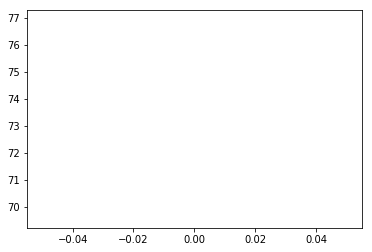

In [12]:
#rough_plot(sqld.last_reward, 10)
plt.plot(sqld.last_reward)

In [13]:
sqld.ratio_local_size

4

In [14]:
sqld.last_w

[[-19.60192419162335,
  36.18534415245806,
  0.1,
  0.1,
  8.022205622293267,
  0.1,
  -57.628399813113006,
  -13.838392644092472,
  0.1]]

w of feature num =  0


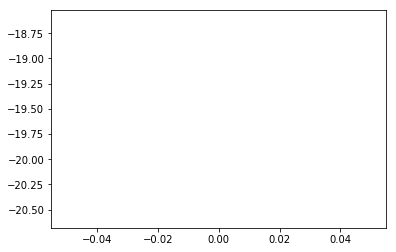

w of feature num =  1


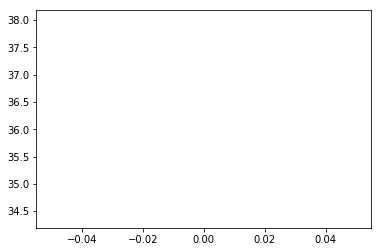

w of feature num =  4


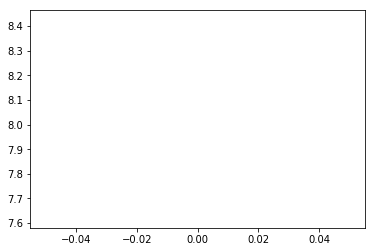

w of feature num =  6


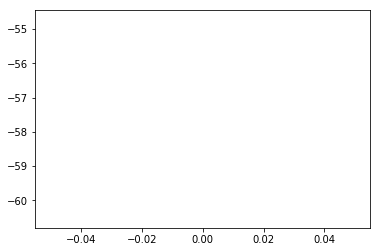

w of feature num =  7


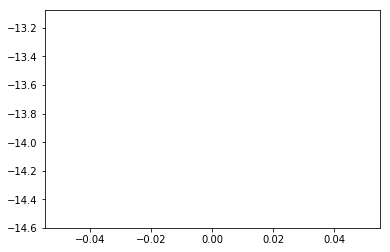

In [15]:
import numpy
def plot_each_w_trend(choose_feature, w_list):
    wListTranspose = numpy.zeros(shape=(len(choose_feature), len(w_list)))

    for feature in range(0, len(choose_feature)):
        if choose_feature[feature]:
            print('w of feature num = ', feature)
            for trial in range(0, len(w_list)):
                wListTranspose[feature][trial] = w_list[trial][feature]
            plt.plot(wListTranspose[feature])
            plt.show()
            
            
plot_each_w_trend(choose_feature, sqld.last_w)

In [16]:
import numpy
def plot_each_w_trend(choose_feature, w_list):
    wListTranspose = numpy.zeros(shape=(len(choose_feature), len(w_list)))

    for feature in range(0, len(choose_feature)):
        if choose_feature[feature]:
            print('feature num = ', feature)
            for trial in range(0, len(w_list)):
                wListTranspose[feature][trial] = w_list[trial][feature]
            print(wListTranspose[feature][:50])
            
plot_each_w_trend(choose_feature, sqld.last_w)

feature num =  0
[-19.60192419]
feature num =  1
[36.18534415]
feature num =  4
[8.02220562]
feature num =  6
[-57.62839981]
feature num =  7
[-13.83839264]
